In [573]:
import pandas as pd
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score


#not grouped
#data=pd.read_csv('/Users/aidantang/Desktop/Gesture_recog/Feature_extract_data/feature_extracted_tdfd.csv')
#grouped
data=pd.read_csv('/Users/aidantang/Desktop/Gesture_recog/Feature_extract_data/S1_features_regrouped.csv')

In [574]:


#dropping rest stimulus windows to see accuracy between actions
data = data[data['Stimulus'] != 0]
#Stim values dropped to isolate test accuracy between 2 groups
#group_testing = [9,10]
#data = data[data['Stimulus'].isin(group_testing)]
#converting stimulus to binary to see if the model can differentiate between rest and stimulus
#data['Stimulus'] = (data['Stimulus'] != 0).astype(int)
train_data = data[data['Repetition'].isin([1, 2, 3])]
val_data = data[data['Repetition'].isin([4])]
test_data = data[data['Repetition'].isin([5,6])]

#split data
X_train = train_data.drop(columns=['Stimulus', 'Repetition'])
y_train = train_data['Stimulus']
X_val = val_data.drop(columns=['Stimulus', 'Repetition'])
y_val = val_data['Stimulus']
X_test = test_data.drop(columns=['Stimulus', 'Repetition'])
y_test = test_data['Stimulus']

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_val = sc_X.transform(X_val)
X_test = sc_X.transform(X_test)


In [575]:
import matplotlib.pyplot as plt

# iterate to find best k value
neighbor_range = range(1, 50)

best_accuracy = 0
best_n_neighbors = 0
accuracies_n = []

for n in neighbor_range:
    knn = KNeighborsClassifier(n_neighbors=n, p=1)
    knn.fit(X_train, y_train)
    y_val_pred = knn.predict(X_val)  # Use validation set for accuracy calculation
    accuracy = accuracy_score(y_val, y_val_pred)
    accuracies_n.append(accuracy)
    # Update best accuracy and corresponding n_neighbors
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_neighbors = n

print(f"Best n_neighbors: {best_n_neighbors} with accuracy: {best_accuracy:.4f}")



Best n_neighbors: 13 with accuracy: 0.6993


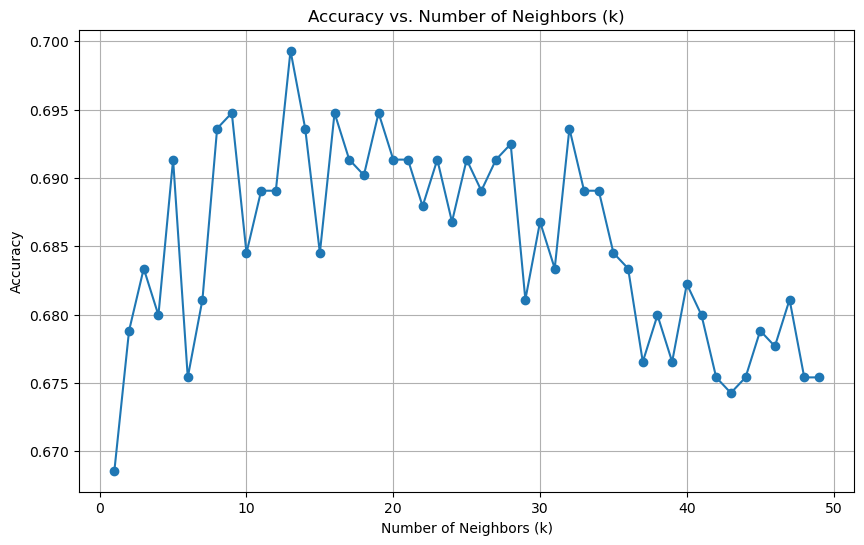

In [576]:
plt.figure(figsize=(10, 6))
plt.plot(neighbor_range, accuracies_n, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.grid(True)
plt.show()

In [577]:
p_range = range(1, 4)

best_accuracy = 0
best_p_value = 0
accuracies_p = []

for p in p_range:
    knn = KNeighborsClassifier(n_neighbors=best_n_neighbors, p=p)
    knn.fit(X_train, y_train)
    y_val_pred = knn.predict(X_val)  # Use validation set
    accuracy = accuracy_score(y_val, y_val_pred)
    accuracies_p.append(accuracy)
    print(f"p: {p}, Accuracy: {accuracy:.4f}")
    # Update best accuracy and corresponding p value
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_p_value = p

print(f"Best p value: {best_p_value} with accuracy: {best_accuracy:.4f}")


p: 1, Accuracy: 0.6993
p: 2, Accuracy: 0.6686
p: 3, Accuracy: 0.6412
Best p value: 1 with accuracy: 0.6993


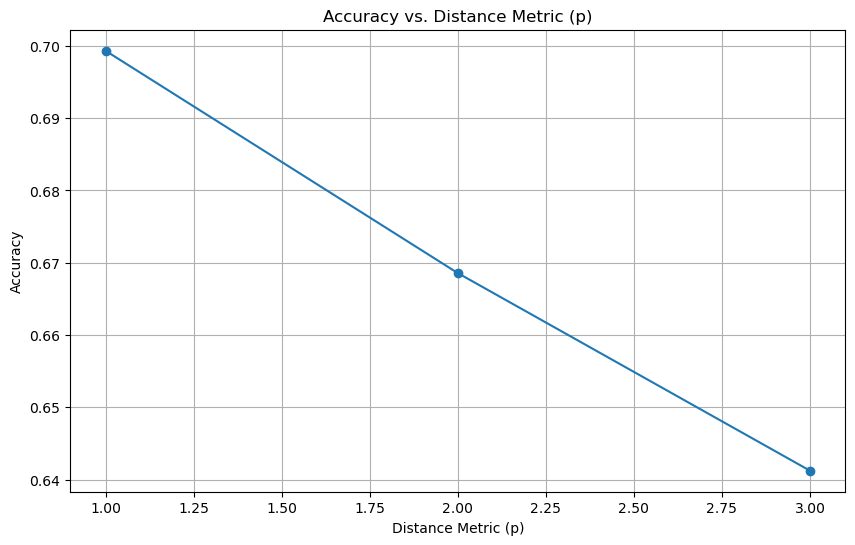

In [578]:
plt.figure(figsize=(10, 6))
plt.plot(p_range, accuracies_p, marker='o', linestyle='-')
plt.xlabel('Distance Metric (p)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Distance Metric (p)')
plt.grid(True)
plt.show()

In [579]:
#Model

knn = KNeighborsClassifier(n_neighbors=best_n_neighbors, p=best_p_value)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))


0.6818941504178273


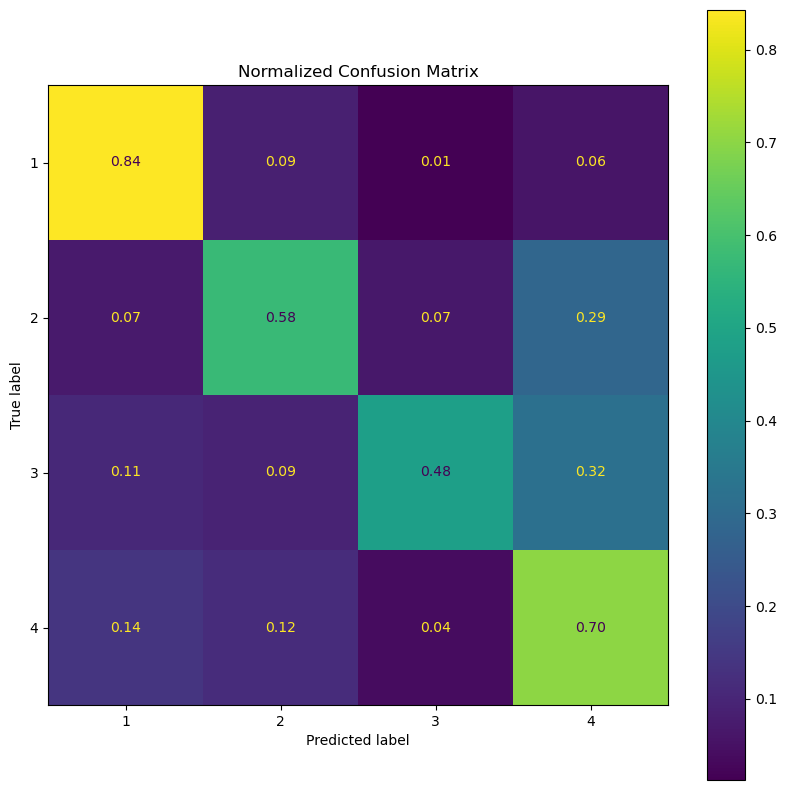

In [580]:
# Evaluate the model

cm = confusion_matrix(y_test, y_pred, normalize='true')
unique_labels = sorted(y_test.unique())

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(cmap='viridis', values_format=".2f", ax=ax)
plt.title('Normalized Confusion Matrix')
plt.show()



In [581]:

# Report the average accuracy
accuracy = accuracy_score(y_test, y_pred)
print({np.mean(accuracy)})

{0.6818941504178273}
